## Storytelling Data Visualization on Exchange Rates
Autor: Danilo de Sousa Lopes

Ao desenvolver o projeto guiado a seguir busca-se:
 - Usar os prícipios do design de informação (familiaridade e maximização da proporção dados/tinta)
 - Como criar visualizações de dados narrativos usando Matplotlib
 - Como criar padrões visuais usando os princípios da Gestalt
 - Como orientar a atenção do público com atributos pré-atenciosos.
 - Como usar os estilos integrados do Matplotlib: com um estudo de caso sobre o estilo FiveThirtyEight.

Iremos combinar essas habilidades, trabalhando com o conjunto de dados reunido por Daria Chemkaeva e disponibilizado no Kaggle, que descreve as taxas de câmbio diárias de diversas moedas entre 1999 e 2020. Nosso objeto de estudo será as taxas de câmbio do Euro e do Dólar, em relação ao real, entre os Governos FHC e Bolsonaro, para a moeda brasileira.            

### Teste & Logging

In [46]:
'''
    Autor: Danilo de Sousa Lopes
    Data: nov/2021
    Criando um  conjunto de configurações para utilizarmos os testes em nosso problema
    proposto. Abaixo iremos definir algumas funções para realizar tais feitos.
'''
import pandas as pd
import logging

# definições do logging
logging.basicConfig(
    filename='test_results.log',
    level=logging.INFO,
    filemode='w',
    format='%(name)s - %(levelname)s - %(message)s')

def read_data(file_path):
    '''
    Função para a ler e verificar o dataframe.csv
    Args:
        file_path (str): arquivo para leitura.
    Return:
        df (Dataframe): retorna o arquivo lido no formato de dataframe.
    '''
    try:
        df = pd.read_csv(file_path)
        logging.info("SUCESSO: nenhum problema ao ler o arquivo!")
        return df
    except:
        logging.error("ERROR: não foi possível ler o arquivo {}".format(file_path))

def calc_rolling_mean(coluna, janela):
    '''
    Função para calcular média móvel dos valores distribuidos em uma coluna
    do dataframe, relação a uma janela temporal.
    Args:
        coluna (str): a coluna que contem a distribuição dos dados.
        janela (int): a janela móvel desejada (7 dias, 30 dias...).
    Return:
        rolling_mean (pandas Series): Serie com as médias móveis.
    '''
    try:
        assert(isinstance(janela, int))
        rolling_mean = coluna.rolling(janela).mean()
        logging.info("SUCESSO: O valor da janela é {} int".format(janela))
        return rolling_mean
    except:
        logging.error("ERROR: O valor da janela deve ser inteiro!")

### Leitura e Análise do Conjunto de Dados

In [47]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# comando mágio para permitir a exibição dos gráficos na célula
%matplotlib inline

# lendo o dataframe .csv
exchange_rates = read_data('euro-daily-hist_1999_2021.csv')

# verificando as primeiras 5 linhas do dataframe
exchange_rates.head()

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
0,2021-09-20,NaN,1.6201,1.9558,6.2495,1.5056,1.0883,7.5726,NaN,25.432,...,86.0700,10.2173,1.5839,NaN,NaN,39.0620,10.1512,NaN,1.1711,17.3301
1,2021-09-17,NaN,1.6111,1.9558,6.2039,1.4913,1.0931,7.6044,NaN,25.296,...,85.4338,10.1553,1.5851,NaN,NaN,39.1450,10.1323,NaN,1.1780,17.1891
2,2021-09-16,NaN,1.6077,1.9558,6.1611,1.4863,1.0886,7.5849,NaN,25.281,...,85.2347,10.1518,1.5805,NaN,NaN,38.9180,9.9663,NaN,1.1763,17.0544
3,2021-09-15,NaN,1.6153,1.9558,6.1979,1.5004,1.0845,7.6069,NaN,25.318,...,85.9738,10.1360,1.5860,NaN,NaN,38.8650,9.9769,NaN,1.1824,16.8973
4,2021-09-14,NaN,1.6114,1.9558,6.1788,1.4951,1.0887,7.6168,NaN,25.389,...,86.1062,10.1453,1.5870,NaN,NaN,38.9270,9.9848,NaN,1.1814,16.8097


In [48]:
# verificando as últimas 5 linhas do dataframe
exchange_rates.tail()

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
5873,1999-01-08,NaN,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,...,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,NaN,1.1659,6.7855
5874,1999-01-07,NaN,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,...,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,NaN,1.1632,6.8283
5875,1999-01-06,NaN,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,...,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,NaN,1.1743,6.7307
5876,1999-01-05,NaN,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,...,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,NaN,1.1790,6.7975
5877,1999-01-04,NaN,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,...,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,NaN,1.1789,6.9358


In [49]:
# extraindo as informações básicas do dataframe
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5878 non-null   object 
 1   [Argentine peso ]         5383 non-null   object 
 2   [Australian dollar ]      5878 non-null   object 
 3   [Bulgarian lev ]          5476 non-null   object 
 4   [Brazilian real ]         5610 non-null   object 
 5   [Canadian dollar ]        5878 non-null   object 
 6   [Swiss franc ]            5878 non-null   object 
 7   [Chinese yuan renminbi ]  5610 non-null   object 
 8   [Cypriot pound ]          2346 non-null   object 
 9   [Czech koruna ]           5878 non-null   object 
 10  [Danish krone ]           5878 non-null   object 
 11  [Algerian dinar ]         5383 non-null   object 
 12  [Estonian kroon ]         3130 non-null   object 
 13  [UK pound sterling ]      5878 non-null   object 
 14  [Greek d

### Limpeza dos Dados

In [50]:
# renomear as colunas [US dollar ], [Brazilian real ] e Period\Unit:  
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               '[Brazilian real ]': 'Euro',
                               'Period\\Unit:': 'Time'},
                      inplace=True)

# mudar o tipo de dados da coluna Time para datetime
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# classificar os valores de Time em ordem crescente
exchange_rates.sort_values('Time', inplace=True)

# reinicializar os índices e eliminar o índice inicial
exchange_rates.reset_index(drop=True, inplace=True)

# veja o resultado nas primeiras 5 linhas
exchange_rates.head()

,Time,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],Euro,[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],US_dollar,[South African rand ]
0,1999-01-04,NaN,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,...,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,NaN,1.1789,6.9358
1,1999-01-05,NaN,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,...,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,NaN,1.1790,6.7975
2,1999-01-06,NaN,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,...,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,NaN,1.1743,6.7307
3,1999-01-07,NaN,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,...,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,NaN,1.1632,6.8283
4,1999-01-08,NaN,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,...,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,NaN,1.1659,6.7855


In [53]:
# separa as colunas Time, Euro e Dollar para atribuir ao novo dataframe exchange_rates_to_real
exchange_rates_to_real = exchange_rates[['Time', 'Euro','US_dollar']].copy()

# analisando a coluna Euro
exchange_rates_to_real['Euro'].value_counts()

-         61
3.0909     4
2.7570     4
3.3277     4
3.2395     4
          ..
3.6845     1
2.8026     1
2.6088     1
3.5565     1
3.6942     1
Name: Euro, Length: 5027, dtype: int64

In [54]:
# analisando a coluna US_dollar
exchange_rates_to_real['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1765     6
          ..
1.2214     1
1.0761     1
1.0928     1
1.1721     1
1.1618     1
Name: US_dollar, Length: 3576, dtype: int64

Note que a coluna Euro e a coluna US_dollar, em 61 e 62 linhas respectivamente  apresentam-se o caráter ‘ - ’ ao invés de valores, para não prejudicar nosso trabalho é necessário removê-las.

In [55]:
# separados os valores que não possuem '-'.
exchange_rates_to_real = exchange_rates_to_real[exchange_rates_to_real['Euro'] != '-']
exchange_rates_to_real = exchange_rates_to_real[exchange_rates_to_real['US_dollar'] != '-']

# removendo os valores nulos
exchange_rates_to_real = exchange_rates_to_real.dropna()

# convertendo a coluna Euro e US_dollar para float
exchange_rates_to_real['Euro'] = exchange_rates_to_real['Euro'].astype(float)
exchange_rates_to_real['US_dollar'] = exchange_rates_to_real['US_dollar'].astype(float)

'''
    O conjunto de dados em questão, nos porporciona a taxa de câmbio do euro para
    diversas moedas, incluindo o real e o dolar. Para obtermos a taxa de câmbio
    do real em relação ao dolar, basta dividirmos real x euro / dolar x euro.
'''
exchange_rates_to_real['US_dollar']= exchange_rates_to_real['Euro']/exchange_rates_to_real['US_dollar']

# analisando as informações das primeiras 5 linhas de exchange_rates_to_real
exchange_rates_to_real.head()

,Time,Euro,US_dollar
268,2000-01-13,1.8718,1.821526
269,2000-01-14,1.8425,1.801956
270,2000-01-17,1.8129,1.796017
271,2000-01-18,1.8066,1.789953
272,2000-01-19,1.8179,1.799010


In [56]:
# analisando as informações das últimas 5 linhas de exchange_rates_to_real
exchange_rates_to_real.tail()

,Time,Euro,US_dollar
5873,2021-09-14,6.1788,5.230066
5874,2021-09-15,6.1979,5.241796
5875,2021-09-16,6.1611,5.237694
5876,2021-09-17,6.2039,5.266469
5877,2021-09-20,6.2495,5.336436


### Análise Gráfica

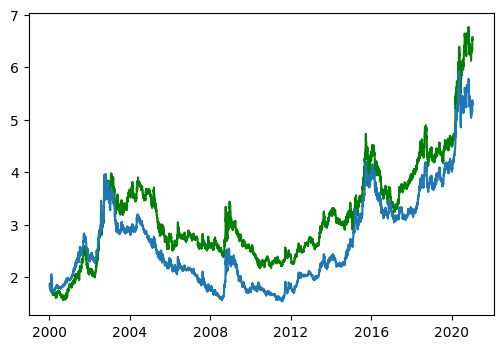

In [9]:
# gerando um gráfico de linhas para visualizar a evolução da taxa de câmbio euro-real e dólar_real
plt.plot(exchange_rates_to_real['Time'], exchange_rates_to_real['Euro'], c = 'g')
plt.plot(exchange_rates_to_real['Time'], exchange_rates_to_real['US_dollar'])
plt.show()

### Média Móvel

#### Euro

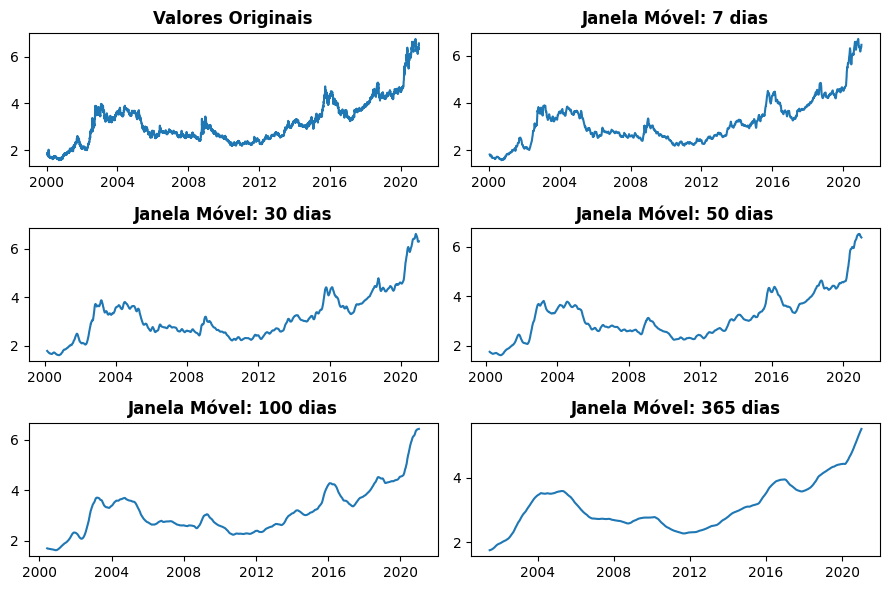

In [10]:
# definindo as propriedades pra figura
plt.figure(figsize=(9,6))
plt.subplot(3,2,1)
plt.plot(exchange_rates_to_real['Time'], exchange_rates_to_real['Euro'])
plt.title('Valores Originais', weight='bold')

'''
 Calculando a média móvel da coluna Euro, usando um janela móvel
 de 7 dias, de 30 dias, de 50 dias, de 100 dias e de 365 dias.
'''
for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(exchange_rates_to_real['Time'],
             exchange_rates_to_real['Euro'].rolling(rolling_mean).mean())
    plt.title('Janela Móvel: ' + str(rolling_mean)+' dias', weight='bold')
    
# ajusta automaticamente o preechimento entre os subplots
plt.tight_layout()
plt.show()

#### Dólar

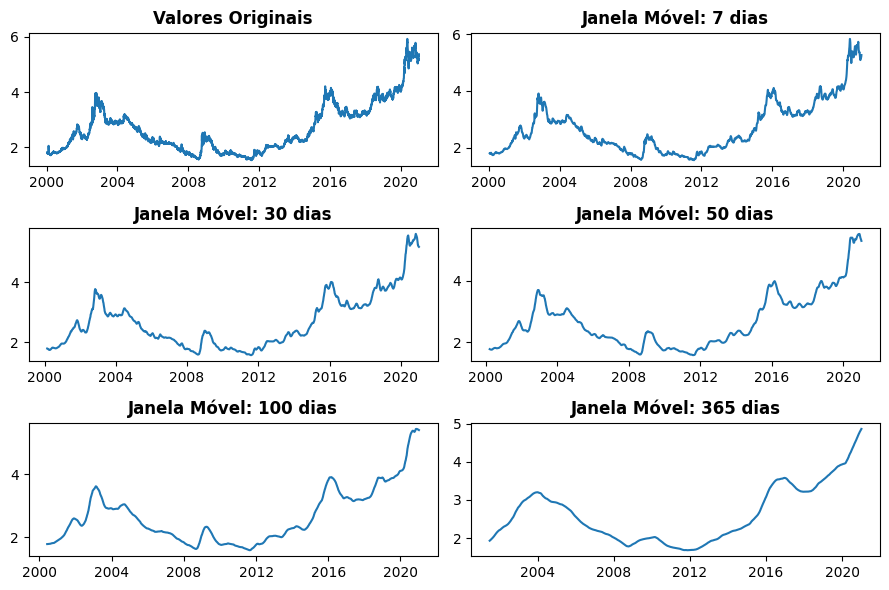

In [11]:
# definindo as propriedades pra figura
plt.figure(figsize=(9,6))
plt.subplot(3,2,1)
plt.plot(exchange_rates_to_real['Time'], exchange_rates_to_real['US_dollar'])
plt.title('Valores Originais', weight='bold')

'''
 Calculando a média móvel da coluna US_dollar, usando um janela móvel
 de 7 dias, de 30 dias, de 50 dias, de 100 dias e de 365 dias.
'''
for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(exchange_rates_to_real['Time'],
             exchange_rates_to_real['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Janela Móvel: ' + str(rolling_mean)+' dias', weight='bold')
    
# ajusta automaticamente o preechimento entre os subplots
plt.tight_layout()
plt.show()

Perceba como o gráfico de linhas muda visualmente à medida que aumentamos a janela móvel. Isso aumenta a proporção de dados por tinta e pode ser útil se quisermos que o público se concentre apenas nas tendências de longo prazo.

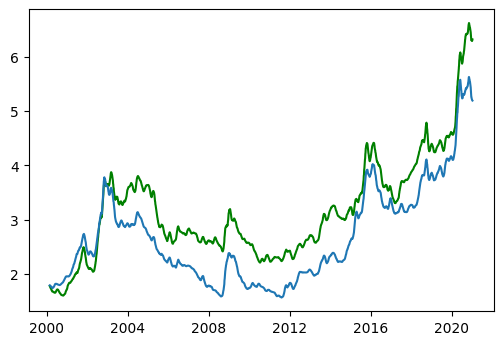

In [12]:
# definindo a janela móvel de 30 dias para utilizarmos.
exchange_rates_to_real['rolling_mean_euro'] = calc_rolling_mean(exchange_rates_to_real['Euro'], 30)
exchange_rates_to_real['rolling_mean_dollar'] = calc_rolling_mean(exchange_rates_to_real['US_dollar'], 30)

# análise gráfica
plt.plot(exchange_rates_to_real['Time'], exchange_rates_to_real['rolling_mean'], c = 'g')
plt.plot(exchange_rates_to_real['Time'], exchange_rates_to_real['rolling_mean'])
plt.show()

In [58]:
exchange_rates_to_real['rolling_mean_euro'] = calc_rolling_mean(exchange_rates_to_real['Euro'], 30)
exchange_rates_to_real['rolling_mean_dollar'] = calc_rolling_mean(exchange_rates_to_real['US_dollar'], 30)


### Análise das Taxas de Câmbio do Real em relação ao Euro durante os Governos Brasileiros entre os anos 2000 e 2021.

In [60]:
# separando as taxas de câmbio do real x euro por governos.
fhc = exchange_rates_to_real.copy()[exchange_rates_to_real['Time'].dt.year < 2003]
lula = exchange_rates_to_real.copy()[(exchange_rates_to_real['Time'].dt.year >= 2003)
                             &(exchange_rates_to_real['Time'].dt.year < 2011)]
dilma = exchange_rates_to_real.copy()[(exchange_rates_to_real['Time'].dt.year >= 2011)
                             &(exchange_rates_to_real['Time'] < '2016-08-31')]
temer = exchange_rates_to_real.copy()[(exchange_rates_to_real['Time'] >= '2016-08-31')
                             &(exchange_rates_to_real['Time'].dt.year < 2019)]
bolsonaro = exchange_rates_to_real.copy()[(exchange_rates_to_real['Time'].dt.year >= 2019)]

#### Gerando o gráfico utilizando o style Fivethirtyeight

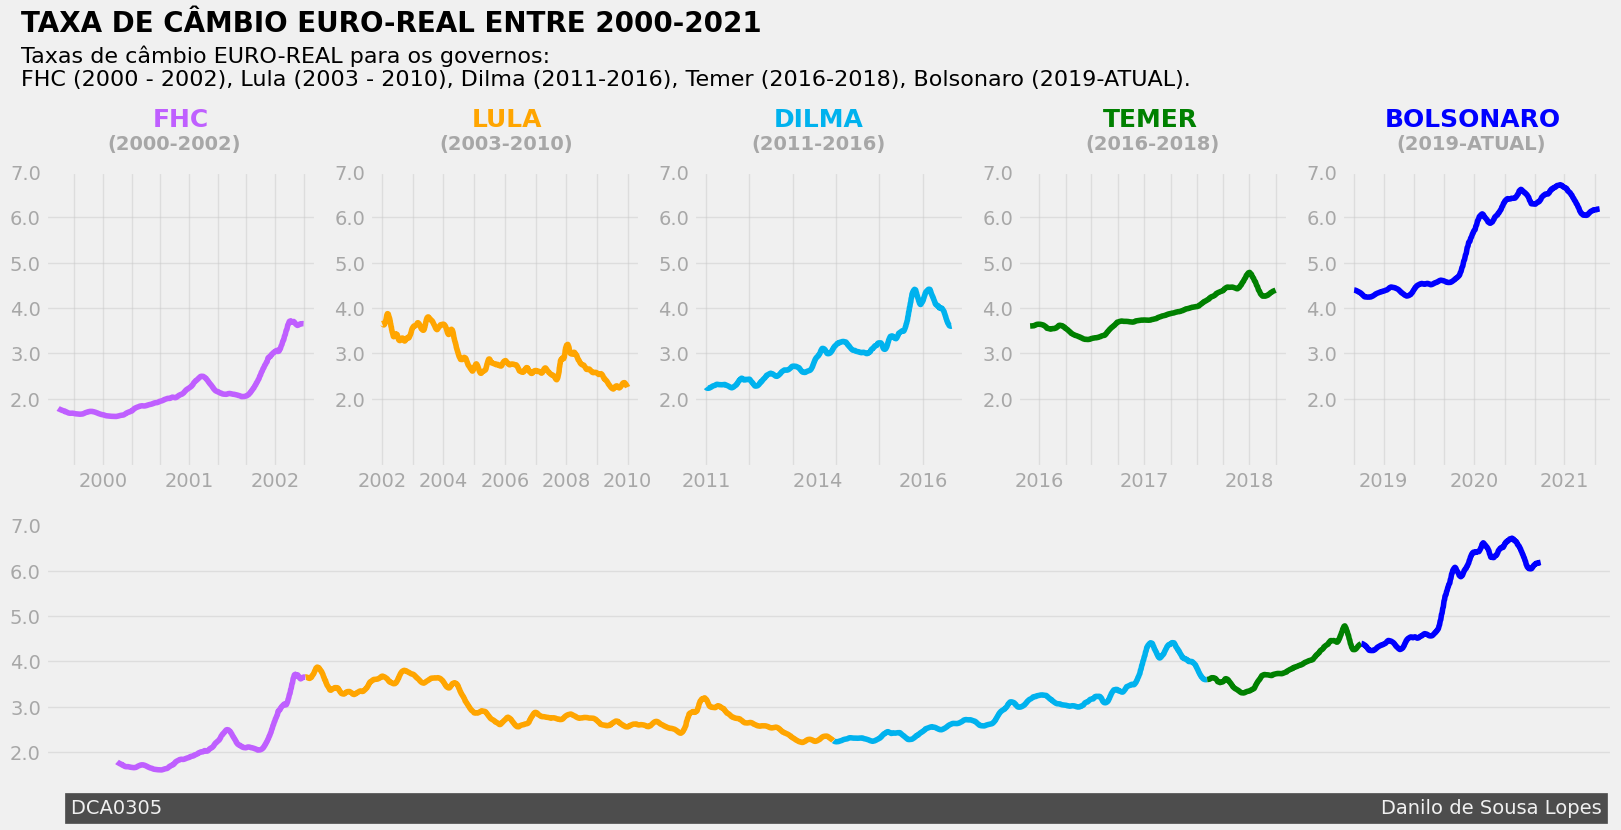

In [61]:
# adicionando o style
import matplotlib.style as style
style.use('fivethirtyeight')

# adicionando os subplots
plt.figure(figsize=(18, 8))
ax1 = plt.subplot(2,5,1)
ax2 = plt.subplot(2,5,2)
ax3 = plt.subplot(2,5,3)
ax4 = plt.subplot(2,5,4)
ax5 = plt.subplot(2,5,5)
ax6 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

# fazendo alterações e adicionando as legendas aos gráficos
for ax in axes:
    ax.set_ylim(0.5, 2.0)
    ax.set_yticks([2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
    ax.set_yticklabels(['2.0', '3.0','4.0','5.0', '6.0','7.0'],
                   alpha=0.3)
    ax.set_xticklabels([])
    ax.grid(alpha=0.5)     
    
# gráfico ax1: fhc
ax1.plot(fhc['Time'], fhc['rolling_mean_euro'], color='#BF5FFF')
ax1.set_xticklabels(['', '2000', '', '', '2001','','', '2002',''], alpha=0.3)
ax1.text(730576.0, 8.0, 'FHC', fontsize=18, weight='bold', color='#BF5FFF')
ax1.text(730380.0, 7.5, '(2000-2002)', weight='bold', alpha=0.3)
    
# gráfico ax2: lula
ax2.plot(lula['Time'], lula['rolling_mean_euro'], color='#ffa500')
ax2.set_xticklabels(['', '2002', '', '2004', '', '2006', '',
                     '2008', '', '2010'],
                   alpha=0.3)
ax2.text(732288.0, 8.0, 'LULA', fontsize=18, weight='bold', color='#ffa500')
ax2.text(731900.0, 7.5, '(2003-2010)', weight='bold', alpha=0.3)

# gráfico ax3: dilma
ax3.plot(dilma['Time'], dilma['rolling_mean_euro'], color='#00B2EE')
ax3.set_xticklabels(['', '2011', '','        2014', '', '', '2016'], alpha=0.3)
ax3.text(734705.0, 8.0, 'DILMA', fontsize=18, weight='bold', color='#00B2EE')
ax3.text(734518.0, 7.5, '(2011-2016)', weight='bold', alpha=0.3)

# gráfico ax4: temer
ax4.plot(temer['Time'], temer['rolling_mean_euro'], color='g')
ax4.set_xticklabels(['2016', '', '', '', '2017', '', '', '','2018'], alpha=0.3)
ax4.text(736460.0, 8.0, 'TEMER', fontsize=18, weight='bold', color='g')
ax4.text(736400.0, 7.5, '(2016-2018)', weight='bold', alpha=0.3)

# gráfico ax5: bolsonaro
ax5.plot(bolsonaro['Time'], bolsonaro['rolling_mean_euro'], color='b')
ax5.set_xticklabels(['', '2019', '','', '2020', '','','2021', ''], alpha=0.3)
ax5.text(737185.0, 8.0, 'BOLSONARO', fontsize=18, weight='bold', color='b')
ax5.text(737230.0, 7.5, '(2019-ATUAL)', weight='bold', alpha=0.3)

# gráfico dos presidentes
ax6.plot(fhc['Time'], fhc['rolling_mean_euro'], color='#BF5FFF')
ax6.plot(lula['Time'], lula['rolling_mean_euro'], color='#ffa500')
ax6.plot(dilma['Time'], dilma['rolling_mean_euro'], color='#00B2EE')
ax6.plot(temer['Time'], temer['rolling_mean_euro'], color='g')
ax6.plot(bolsonaro['Time'], bolsonaro['rolling_mean_euro'], color='b')
ax6.grid(alpha=0.5)
ax6.set_xticks([])

# título e subtitulo do gráfico
ax1.text(730016.0, 10.1, 'TAXA DE CÂMBIO EURO-REAL ENTRE 2000-2021',
         fontsize=20, weight='bold')
ax1.text(730016.0, 8.9, '''Taxas de câmbio EURO-REAL para os governos: 
FHC (2000 - 2002), Lula (2003 - 2010), Dilma (2011-2016), Temer (2016-2018), Bolsonaro (2019-ATUAL).''',fontsize=16)

# adicionando assinatura
ax6.text(729916.0, 0.65, 'DCA0305' + ' '*195 + 'Danilo de Sousa Lopes',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',size=14)
plt.savefig("euro_to_real.png")

### Análise das Taxas de Câmbio do Real em relação ao Dólar durante os Governos Brasileiros entre os anos 2000 e 2021.

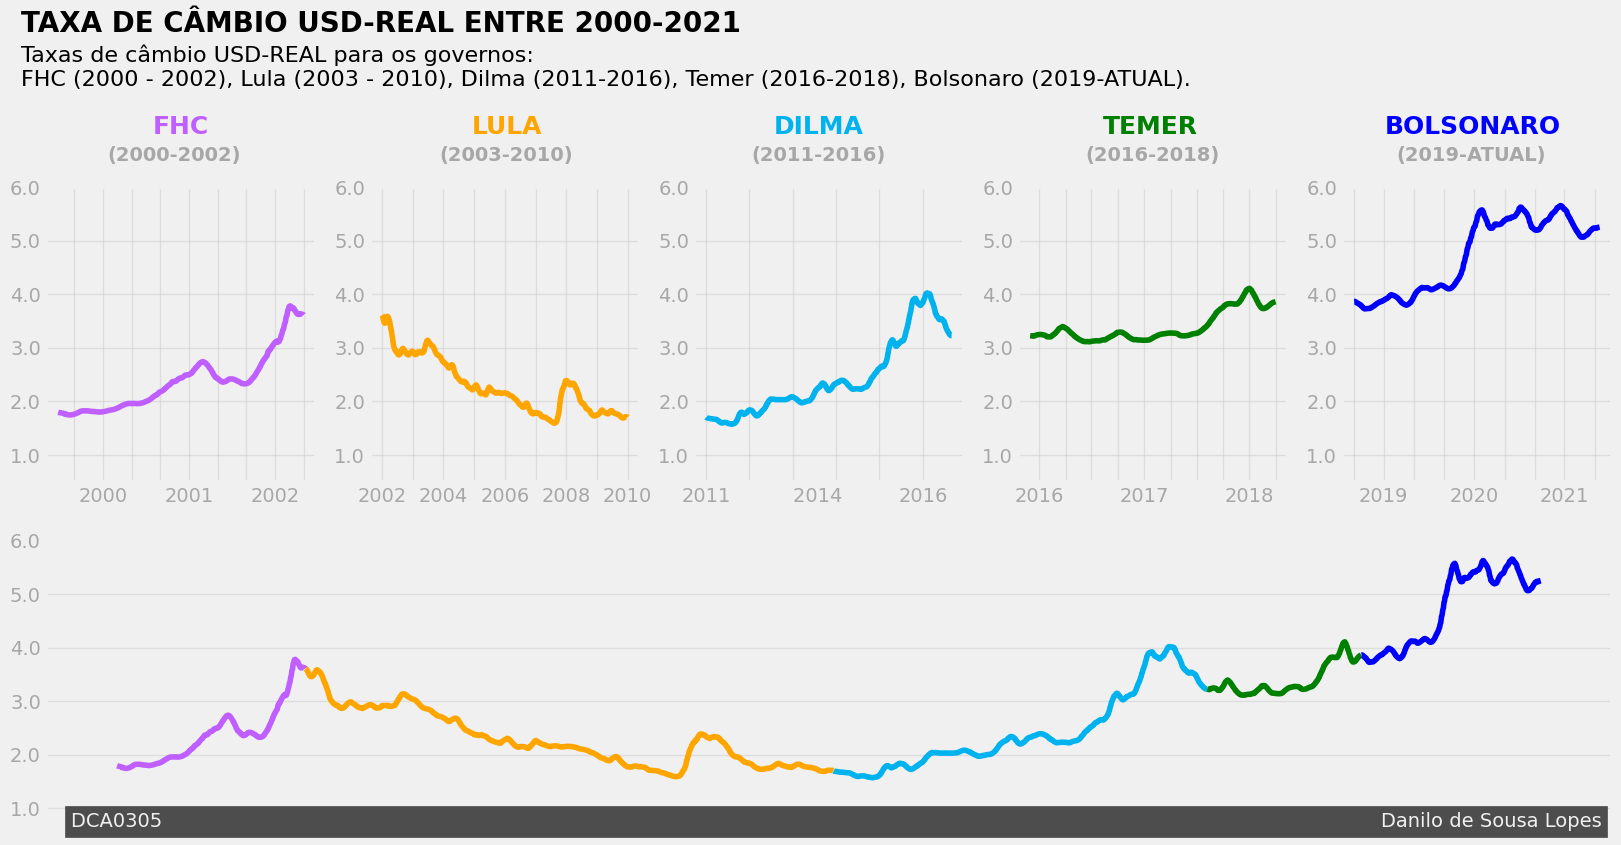

In [63]:
# adicionando os subplots
plt.figure(figsize=(18, 8))
ax1 = plt.subplot(2,5,1)
ax2 = plt.subplot(2,5,2)
ax3 = plt.subplot(2,5,3)
ax4 = plt.subplot(2,5,4)
ax5 = plt.subplot(2,5,5)
ax6 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

# fazendo alterações e adicionando as legendas aos gráficos
for ax in axes:
    ax.set_ylim(0.5, 2.0)
    ax.set_yticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
    ax.set_yticklabels(['1.0', '2.0','3.0','4.0', '5.0','6.0'],
                   alpha=0.3)
    ax.set_xticklabels([])
    ax.grid(alpha=0.5)     
    
# gráfico ax1: fhc
ax1.plot(fhc['Time'], fhc['rolling_mean_dollar'], color='#BF5FFF')
ax1.set_xticklabels(['', '2000', '', '', '2001','','', '2002',''], alpha=0.3)
ax1.text(730576.0, 7.0, 'FHC', fontsize=18, weight='bold', color='#BF5FFF')
ax1.text(730380.0, 6.5, '(2000-2002)', weight='bold', alpha=0.3)
    
# gráfico ax2: lula
ax2.plot(lula['Time'], lula['rolling_mean_dollar'], color='#ffa500')
ax2.set_xticklabels(['', '2002', '', '2004', '', '2006', '',
                     '2008', '', '2010'],
                   alpha=0.3)
ax2.text(732288.0, 7.0, 'LULA', fontsize=18, weight='bold', color='#ffa500')
ax2.text(731900.0, 6.5, '(2003-2010)', weight='bold', alpha=0.3)

# gráfico ax3: dilma
ax3.plot(dilma['Time'], dilma['rolling_mean_dollar'], color='#00B2EE')
ax3.set_xticklabels(['', '2011', '','        2014', '', '', '2016'], alpha=0.3)
ax3.text(734705.0, 7.0, 'DILMA', fontsize=18, weight='bold', color='#00B2EE')
ax3.text(734518.0, 6.5, '(2011-2016)', weight='bold', alpha=0.3)

# gráfico ax4: temer
ax4.plot(temer['Time'], temer['rolling_mean_dollar'], color='g')
ax4.set_xticklabels(['2016', '', '', '', '2017', '', '', '','2018'], alpha=0.3)
ax4.text(736460.0, 7.0, 'TEMER', fontsize=18, weight='bold', color='g')
ax4.text(736400.0, 6.5, '(2016-2018)', weight='bold', alpha=0.3)

# gráfico ax5: bolsonaro
ax5.plot(bolsonaro['Time'], bolsonaro['rolling_mean_dollar'], color='b')
ax5.set_xticklabels(['', '2019', '','', '2020', '','','2021', ''], alpha=0.3)
ax5.text(737185.0, 7.0, 'BOLSONARO', fontsize=18, weight='bold', color='b')
ax5.text(737230.0, 6.5, '(2019-ATUAL)', weight='bold', alpha=0.3)

# gráfico dos presidentes
ax6.plot(fhc['Time'], fhc['rolling_mean_dollar'], color='#BF5FFF')
ax6.plot(lula['Time'], lula['rolling_mean_dollar'], color='#ffa500')
ax6.plot(dilma['Time'], dilma['rolling_mean_dollar'], color='#00B2EE')
ax6.plot(temer['Time'], temer['rolling_mean_dollar'], color='g')
ax6.plot(bolsonaro['Time'], bolsonaro['rolling_mean_dollar'], color='b')
ax6.grid(alpha=0.5)
ax6.set_xticks([])

# título e subtitulo do gráfico
ax1.text(730016.0, 8.9, 'TAXA DE CÂMBIO USD-REAL ENTRE 2000-2021',
         fontsize=20, weight='bold')
ax1.text(730016.0, 7.9, '''Taxas de câmbio USD-REAL para os governos: 
FHC (2000 - 2002), Lula (2003 - 2010), Dilma (2011-2016), Temer (2016-2018), Bolsonaro (2019-ATUAL).''',fontsize=16)

# adicionando assinatura
ax6.text(729916.0, 0.65, 'DCA0305' + ' '*195 + 'Danilo de Sousa Lopes',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',size=14)
plt.savefig("dollar_to_real.png")

### Análise das Taxas de Câmbio do Real, contrastre entre os gráfios Euro x Real e Dólar x Real

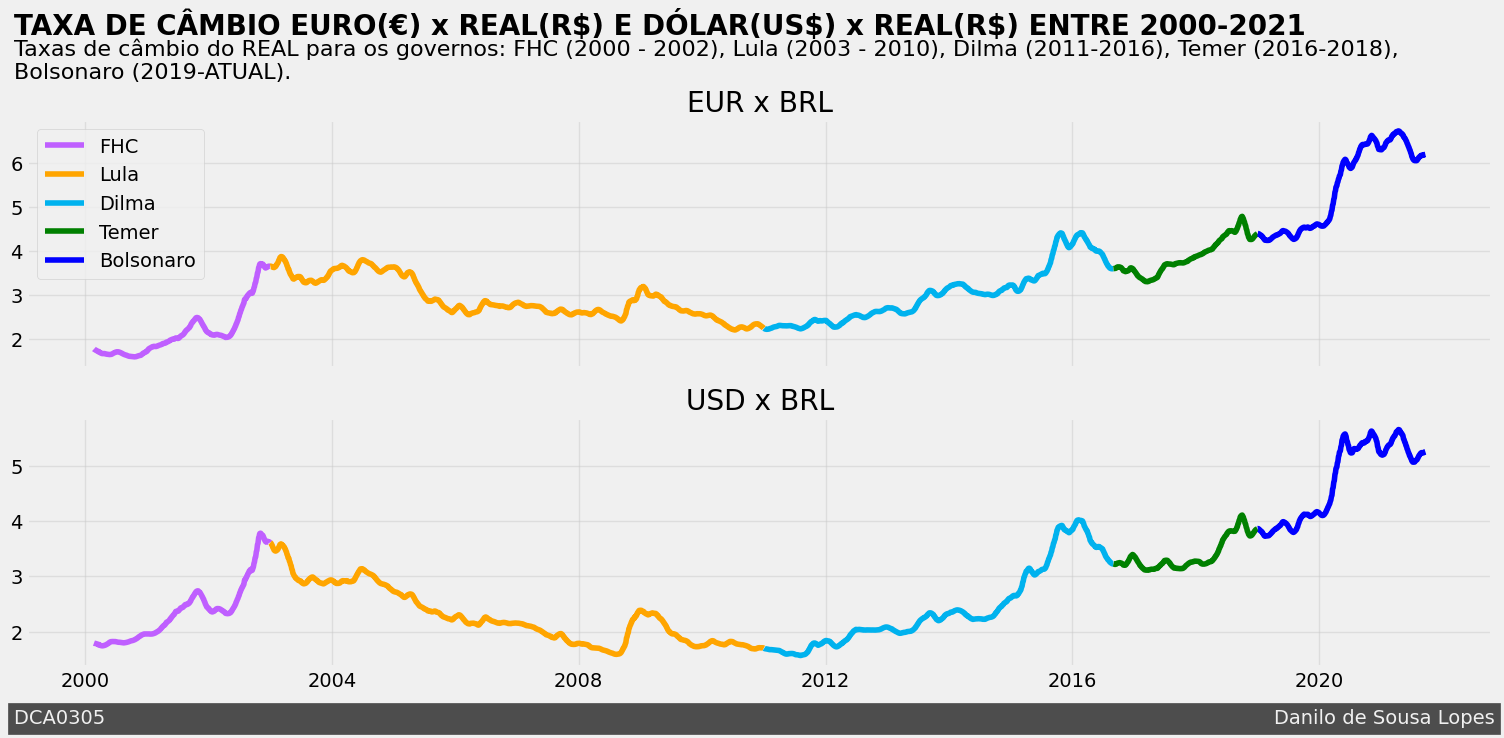

In [64]:
# definindo as propriedades da figura
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (16,8))

# adicionando o título e subtitulo ao gráfico
ax1.text(729700.0, 8.9, 'TAXA DE CÂMBIO EURO(€) x REAL(R$) E DÓLAR(US$) x REAL(R$) ENTRE 2000-2021',
         fontsize=20, weight='bold')
ax1.text(729700.0, 7.9, '''Taxas de câmbio do REAL para os governos: FHC (2000 - 2002), Lula (2003 - 2010), Dilma (2011-2016), Temer (2016-2018), 
Bolsonaro (2019-ATUAL).''',fontsize=16)

# gráfico real x euro
ax1.plot(fhc['Time'], fhc['rolling_mean_euro'], color='#BF5FFF', label="FHC")
ax1.plot(lula['Time'], lula['rolling_mean_euro'], color='#ffa500', label="Lula")
ax1.plot(dilma['Time'], dilma['rolling_mean_euro'], color='#00B2EE', label="Dilma")
ax1.plot(temer['Time'], temer['rolling_mean_euro'], color='g', label="Temer")
ax1.plot(bolsonaro['Time'], bolsonaro['rolling_mean_euro'], color='b', label="Bolsonaro")
ax1.set_title('EUR x BRL')
ax1.grid(alpha=0.5) 
ax1.legend()

# gráfico real x dólar
ax2.plot(fhc['Time'], fhc['rolling_mean_dollar'], color='#BF5FFF')
ax2.plot(lula['Time'], lula['rolling_mean_dollar'], color='#ffa500')
ax2.plot(dilma['Time'], dilma['rolling_mean_dollar'], color='#00B2EE')
ax2.plot(temer['Time'], temer['rolling_mean_dollar'], color='g')
ax2.plot(bolsonaro['Time'], bolsonaro['rolling_mean_dollar'], color='b')
ax2.set_title('USD x BRL')
ax2.grid(alpha=0.5)

# adicionando assinatura
ax2.text(729700.0, 0.33, 'DCA0305' + ' '*187 + 'Danilo de Sousa Lopes',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',size=14)
plt.savefig("euro_dollar_to_real.png")
plt.tight_layout()
plt.subplots_adjust(top=0.8, wspace=0.3)
plt.show()